# Assignment 1
Rony Avivi & Avigail Shahar





In [1]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/odedovadia/AdvancedMLDLCourse.git

fatal: destination path 'AdvancedMLDLCourse' already exists and is not an empty directory.


##Data Exploration:
Throughout this exercise we'll be using the bike sharing dataset. Our goal is to predict the number of bicycles that were rented in each day of the testing set (target variable named 'count'). 

According to the documentation, these are the definition of all variables:

**date time:** time of rental.
<br>**season:** 1:winter, 2:spring, 3:summer, 4:fall.
<br>**holiday:** Is it a bank holiday? If so: 1, else 0.
<br>**working day:** Is it a working day? If so: 1, else 0.
<br>**weather:** 1-4 :
<br>*1:* Clear, Few clouds, Partly cloudy, Partly cloudy.
<br>*2:* Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist.
<br>*3:* Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.
<br>*4:* Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
<br>**temp:** the temperature at that date.
<br>**avg temp:** average temperature.
<br>**humidity:** the humidity at that date.
<br>**windspeed:** the windspeed at that date.
<br>**pollution:** the pollution at that date.
<br>**sunlight:** the sunlight at that date.
<br>**traffic:** the traffic at that date.
<br>**count:** the number of bicycles that were rented.

### Loading the data: 

In [3]:
train = pd.read_csv('/content/AdvancedMLDLCourse/Assignments/Assignment I/train.csv')


Examine the data:

In [4]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,35
1,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,251
2,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,53
3,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,296
4,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2012-01-14 02:00:00,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489,38
8160,2011-12-10 09:00:00,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000,149
8161,2011-12-18 16:00:00,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615,234
8162,2011-02-19 07:00:00,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242,22


We can see that there are 12 variables (columns) and 8164 samples (rows) in the dataset. 'count' is our target (the number of bicycles that were rented in each date) so we'll split the dataframe to two:

In [5]:
X = train.drop(['count'], axis=1)
Y = train[['count']]
X, Y

(                 datetime  season  holiday  workingday  weather   temp  \
 0     2011-07-11 00:00:00       3        0           1        1  28.70   
 1     2012-05-18 22:00:00       2        0           1        1  22.96   
 2     2011-04-01 23:00:00       2        0           1        1  12.30   
 3     2012-09-16 09:00:00       3        0           0        1  23.78   
 4     2011-02-01 23:00:00       1        0           1        3   8.20   
 ...                   ...     ...      ...         ...      ...    ...   
 8159  2012-01-14 02:00:00       1        0           0        1   6.56   
 8160  2011-12-10 09:00:00       4        0           0        1  11.48   
 8161  2011-12-18 16:00:00       4        0           0        1  11.48   
 8162  2011-02-19 07:00:00       1        0           0        1  15.58   
 8163  2012-05-02 07:00:00       2        0           1        2  22.14   
 
        atemp  humidity  windspeed  pollution  sunlight   traffic  
 0     32.575        65    12.

What we want to know about the data currently :
- how many null values in each feature.
- how many different values each feature gets.
- what is the type of each feature.


In [6]:
def Describe_data (data : pd.DataFrame) : 
    columns_lst = ['Feature Name', 'Null', 'Type','Unique Values']
    final = pd.DataFrame (columns = columns_lst)
    for column in data.columns[:] : 
        cur_row =[column, data[column].isna().sum(), data[column].dtypes ,data[column].nunique()]
        final.loc[final.shape[0]] = cur_row
    return (final)

Describe_data(train)

,Feature Name,Null,Type,Unique Values
0,datetime,0,object,8164
1,season,0,int64,4
2,holiday,0,int64,2
3,workingday,0,int64,2
4,weather,0,int64,4
5,temp,0,float64,49
6,atemp,0,float64,60
7,humidity,0,int64,87
8,windspeed,0,float64,28
9,pollution,0,float64,8164


We are happy to see that the data does'nt contain any null values.
Also, almost all variables are numeric, either float or int. In some colums the numbers indicate for categorial / binaric features.
<br> The 'datetime' column is 'object', which means pandas currently views these values as strings. We will convert the 'datetime' column to 'datetime' type so we can analyze and engineer it properly and conveniently. 

In [7]:
import datetime
X['datetime'] = pd.to_datetime(X['datetime'])

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    8164 non-null   datetime64[ns]
 1   season      8164 non-null   int64         
 2   holiday     8164 non-null   int64         
 3   workingday  8164 non-null   int64         
 4   weather     8164 non-null   int64         
 5   temp        8164 non-null   float64       
 6   atemp       8164 non-null   float64       
 7   humidity    8164 non-null   int64         
 8   windspeed   8164 non-null   float64       
 9   pollution   8164 non-null   float64       
 10  sunlight    8164 non-null   float64       
 11  traffic     8164 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 765.5 KB


Let's look at some statistical attributes of the data:

In [9]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
count,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,2.510289,0.029397,0.683244,1.415483,20.244980,23.670160,61.835130,12.791334,47.152120,20.245980,0.004986,191.339784
std,1.117178,0.168928,0.465240,0.631242,7.796018,8.468725,19.255791,8.213914,72.882602,7.796018,0.006319,181.143178
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000304,0.821000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,3.693188,13.941000,0.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.684113,20.501000,0.000242,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,59.257746,26.241000,0.004489,285.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,754.304876,41.001000,0.015615,970.000000


We can see the some of the features values are in different scales, so we might want to normalize them later.

Let's look at the Pearson correlation between the features:

In [10]:
correlations = train.corr()

Let's plot the correlation matrix using matplotlib and seaborn:

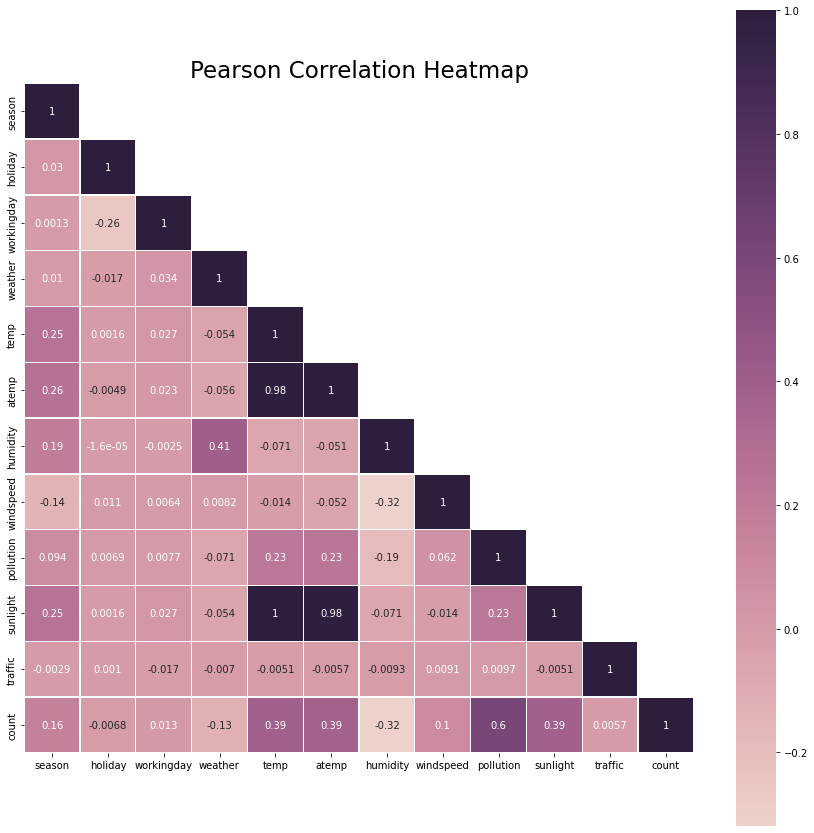

In [11]:
mask = np.zeros_like(correlations, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

fig, ax = plt.subplots(figsize=(15, 15))
plt.title('Pearson Correlation Heatmap', fontsize=23)

sns.heatmap(correlations, linewidths=0.25, vmax=1.0, square=True, cmap=sns.cubehelix_palette(as_cmap=True),
            linecolor='w', annot=True, mask=mask)

## Conclusions ⛅ 
- There is a very large correlation between the 3 parameters : sunlight, temp & atemp.
- We might exclude one or 2 of those parameters in the future because they all gives us almost the same information, what indicates we don't get any extra info from keeping all of them.

Let's plot the correlation between the highly correlated features:
<br>"temp" & "atemp",
<br>"sunlight" & "temp",
<br>"sunlight & "atemp".


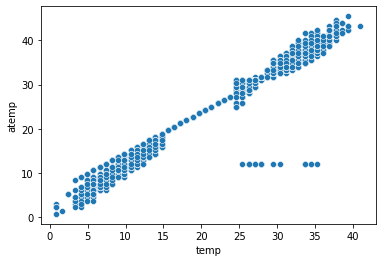

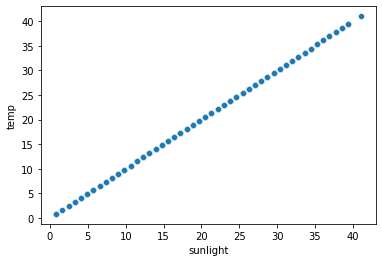

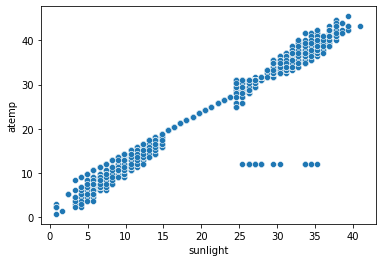

In [12]:
# plotting the high correlated features corralation

sns.scatterplot(x="temp", y="atemp", data=X);
plt.show()
sns.scatterplot(x="sunlight", y="temp", data=X);
plt.show()
sns.scatterplot(x="sunlight", y="atemp", data=X);
plt.show()

Let's visualize some numeric data:

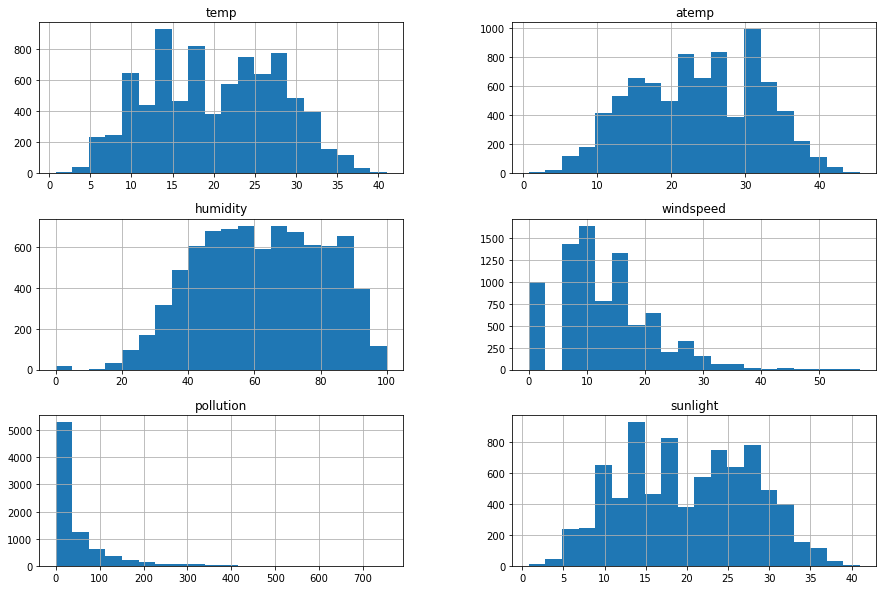

In [13]:
numeric_features= ['temp', 'atemp', 'humidity', 'windspeed', 'pollution', 'sunlight']
train[numeric_features].hist(bins =20, figsize = (15,10))
plt.show()


From the histograms we can see the way different features are distributed (for further conclusions). <br>We noticed that 'pollution' and 'windspeed'  distributions are very skewed.


Let's visualize some categorical data:

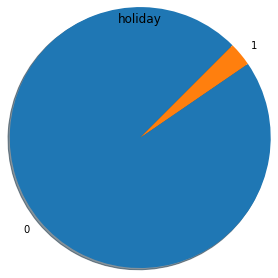

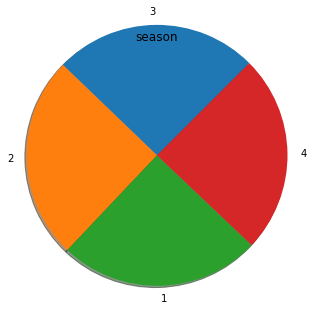

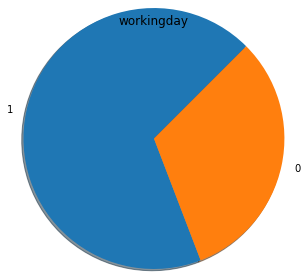

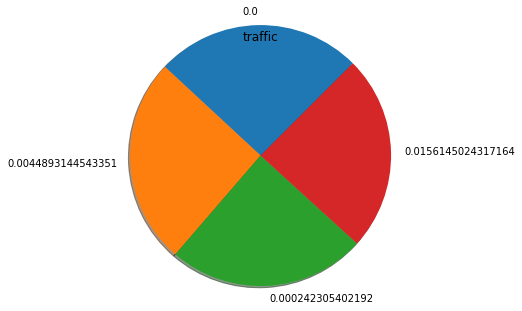

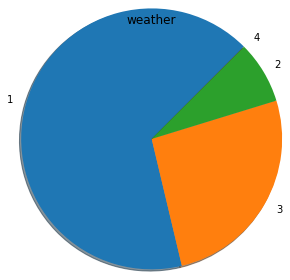

In [14]:
def piechart_features(data ,features):    
    for f in features :
        cur = data[f]
        values = list(cur.value_counts()) 
        mylabels = list(cur.unique())
        plt.pie(values, labels = mylabels, shadow = True, startangle=45,radius = 1.5)
        plt.title(f)
        plt.show()




cat_cols = ['holiday','season','workingday','traffic','weather']
piechart_features(train,cat_cols)

We can see that the different categories in 'traffic' and  'season' are pretty balanced.

Now, we want to see the correlation of each feature with the lable "count", that is the target in our case.
The hypothesis is that feature with high correlation to the lable will be more important for the model performance in the future.

,count
humidity,-0.318591
weather,-0.127838
holiday,-0.006760
traffic,0.005659
workingday,0.013213
windspeed,0.102783
season,0.162900
atemp,0.385754
sunlight,0.389597
temp,0.389597


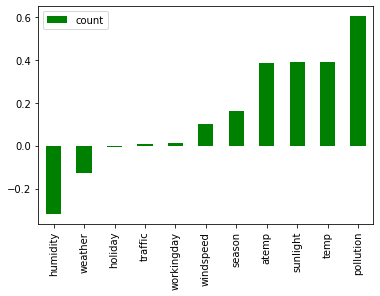

In [15]:

def correlation_numeric_target (data: pd.DataFrame):
    X = data.corr(method = 'pearson')['count'][:-1].sort_values()
    X = pd.DataFrame(data=X)
    X.plot(kind='bar',color='green')
    return (X)
    
correlation_numeric_target(train)




We can see that 'pollution' has high correlation with the lable, and also we can get another assurance for the correlation between 'temp', 'atemp' and 'sunlight' features - as they correlate almost equally with the lable.

## Pre-processing
*Feature Engineering*


Handling features with high correlation - dropping the feature 'temp' in which it's correlation with 'sunlight' is 100%:

In [16]:
def delete_corr_features(df):
    df.drop('temp', axis = 1, inplace = True)
    return df

X = delete_corr_features(X)

In [17]:
X

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,pollution,sunlight,traffic
0,2011-07-11 00:00:00,3,0,1,1,32.575,65,12.9980,5.354100,28.701,0.000000
1,2012-05-18 22:00:00,2,0,1,1,26.515,52,22.0028,85.425233,22.961,0.004489
2,2011-04-01 23:00:00,2,0,1,1,15.910,61,6.0032,2.040899,12.301,0.000242
3,2012-09-16 09:00:00,3,0,0,1,27.275,60,8.9981,26.682772,23.781,0.004489
4,2011-02-01 23:00:00,1,0,1,3,9.850,93,12.9980,5.851754,8.201,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
8159,2012-01-14 02:00:00,1,0,0,1,8.335,47,11.0014,14.953355,6.561,0.004489
8160,2011-12-10 09:00:00,4,0,0,1,12.880,61,19.0012,7.977025,11.481,0.000000
8161,2011-12-18 16:00:00,4,0,0,1,13.635,48,16.9979,6.916512,11.481,0.015615
8162,2011-02-19 07:00:00,1,0,0,1,19.695,17,35.0008,0.095445,15.581,0.000242


**Creating new features:**

Let's break apart apart the 'datetime' featur and get the year, month, day, day of week and hour.

In [18]:
def create_new_date_features(df): 
  df['year']= df['datetime'].dt.year
  df['month']= df['datetime'].dt.month
  df['day']= df['datetime'].dt.day
  df['dayofweek'] = df['datetime'].dt.dayofweek
  df['hour']= df['datetime'].dt.hour
  return df

# verifing our work
X = create_new_date_features(X)
X[['datetime','year','month','day','dayofweek','hour']].head(10)


,datetime,year,month,day,dayofweek,hour
0,2011-07-11 00:00:00,2011,7,11,0,0
1,2012-05-18 22:00:00,2012,5,18,4,22
2,2011-04-01 23:00:00,2011,4,1,4,23
3,2012-09-16 09:00:00,2012,9,16,6,9
4,2011-02-01 23:00:00,2011,2,1,1,23
5,2012-08-07 12:00:00,2012,8,7,1,12
6,2012-11-06 21:00:00,2012,11,6,1,21
7,2011-07-13 22:00:00,2011,7,13,2,22
8,2012-09-19 23:00:00,2012,9,19,2,23
9,2012-06-02 12:00:00,2012,6,2,5,12


At this point it would be good to explore our dates a bit.

In [19]:
X.groupby('year').size()

year
2011    4064
2012    4100
dtype: int64

In [20]:
X.groupby('month').size()

month
1     650
2     678
3     679
4     665
5     699
6     687
7     679
8     692
9     668
10    695
11    695
12    677
dtype: int64

In [21]:
X.groupby('dayofweek').size()

dayofweek
0    1155
1    1166
2    1170
3    1171
4    1156
5    1177
6    1169
dtype: int64

In [22]:
X.groupby('hour').size()

hour
0     350
1     335
2     345
3     327
4     337
5     343
6     340
7     337
8     344
9     337
10    342
11    332
12    336
13    330
14    335
15    345
16    342
17    352
18    357
19    341
20    339
21    329
22    338
23    351
dtype: int64

As we can see here, the dataset contains information abut every day and every month in the years 2011-2012.

Let’s check if the 'hour' feature has some corrolation with 'counts':

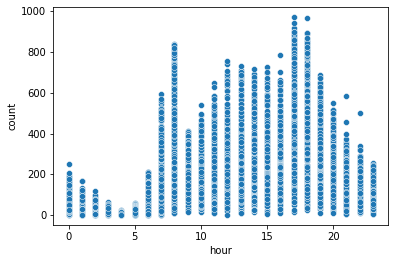

0.40616998564636053

In [23]:
sns.scatterplot(x='hour', y=train['count'], data=X);
plt.show()
X['hour'].corr(train['count'])

Looks like there is a correlation between the hour of the day and the counts. <br> We can see that more bikes are being used around 08:00 am and around 17:00 pm.

We chose to remove the datetime parameter, since we saved all the information that was in this feature separatly, and we can remove it without losing information.
Also we can see that the correlation is higher when the features are presented separatly.

In [24]:
def drop_datetime(df) :
  df.drop('datetime', axis = 1, inplace = True)
  return df

X = drop_datetime(X)


In the exploration part, we saw that the features 'pollution', 'atemp', and 'sunlight' have a positive correlation with the label while 'humidity' and 'weather' have a negative correlation with it. <br>
Let's create a new feature 'its_getting_hot_in_here' that combines 'pollution', 'atemp', and 'sunlight' and extracts 'humidity' and 'weather' and check its correlation with the label.

In [25]:
def create_new_weather_feature(df):  
  df['its_getting_hot_in_here'] =( (df['pollution']) + (df['atemp']) + (df['sunlight']) ) - (df['humidity'] + df['weather'])
  return df

create_new_weather_feature(X)
X['its_getting_hot_in_here'].corr(train['count'])

0.6718558268867101

#Model Selection : 

Now that we have the data prepared, we can proceed to train a model. Given a set of features, our goal is to predict a real number - the value of the property. In other words, this is a regression probelm so we'll only consider regression algorithms. We choose to consider the following models : <br>


*   Random forest
*   Linear regression
*   Decision tree





In [26]:
models = {'Random forest': None,
          'Linear regression': None,
          'Decision tree': None}


## Random Forest :

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [28]:
def run_random_forest(x_train, y_train):
  rf = RandomForestRegressor(n_estimators=200, random_state=42)
  tuned_rf = GridSearchCV(estimator=rf, 
                          param_grid={'max_features': ['auto', 'sqrt', 'log2', 1/3]},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3,
                          refit=True)
  tuned_rf.fit(x_train, y_train)
  return tuned_rf

##Linear regression : 

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [30]:
def run_linear_regression(x_train, y_train):
  lr = LinearRegression()
  lr.fit(x_train, np.ravel(y_train))
  cv_score = cross_val_score(lr, x_train, y_train, scoring='neg_mean_squared_error', cv=3)
  return lr, cv_score

##Decision tree :

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
def run_decision_tree(X_train,Y_train):
  dt= DecisionTreeRegressor(random_state=42)
  tuned_dt = GridSearchCV(estimator=dt, 
                          param_grid={'max_features': ['auto', 'sqrt', 'log2', 1/3]},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3)
  tuned_dt.fit(X_train, Y_train)
  return tuned_dt

# Evaluating models on train data: 

In [33]:
def run_all_models(x, y):
  models_dict = {}
  models_dict['Random forest'] = run_random_forest(x, y)
  models_dict['Linear regression'] = run_linear_regression(x, y)
  models_dict['Decision tree'] = run_decision_tree(x, y)
  return models_dict

In [34]:
import time

In [35]:
models_dict = {}

In [36]:
t0 = time.time()
models_dict['Random forest'] = run_random_forest(X, Y)
print(f'Runtime random forest: {round(time.time()-t0,2)} seconds')

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .............max_features=auto;, score=-3511.680 total time=   7.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .............max_features=auto;, score=-3385.850 total time=  10.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .............max_features=auto;, score=-3201.206 total time=   6.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .............max_features=sqrt;, score=-5804.393 total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .............max_features=sqrt;, score=-6341.628 total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .............max_features=sqrt;, score=-6395.319 total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .............max_features=log2;, score=-5804.393 total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .............max_features=log2;, score=-6341.628 total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .............max_features=log2;, score=-6395.319 total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_features=0.3333333333333333;, score=-5273.575 total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_features=0.3333333333333333;, score=-5640.553 total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_features=0.3333333333333333;, score=-5714.353 total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Runtime random forest: 50.75 seconds


In [37]:
t0 = time.time()
models_dict['Linear regression'] = run_linear_regression(X, Y)
print(f'Runtime linear regression: {round(time.time()-t0,2)} seconds')

Runtime linear regression: 0.04 seconds


In [38]:
t0 = time.time()
models_dict['Decision tree'] = run_decision_tree(X,Y)
print(f'Runtime Decision tree: {round(time.time()-t0,2)} seconds')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .............max_features=auto;, score=-6100.539 total time=   0.1s
[CV 2/3] END .............max_features=auto;, score=-6315.865 total time=   0.1s
[CV 3/3] END .............max_features=auto;, score=-6512.233 total time=   0.0s
[CV 1/3] END ............max_features=sqrt;, score=-12864.708 total time=   0.0s
[CV 2/3] END ............max_features=sqrt;, score=-16733.771 total time=   0.0s
[CV 3/3] END ............max_features=sqrt;, score=-14717.220 total time=   0.0s
[CV 1/3] END ............max_features=log2;, score=-12864.708 total time=   0.0s
[CV 2/3] END ............max_features=log2;, score=-16733.771 total time=   0.0s
[CV 3/3] END ............max_features=log2;, score=-14717.220 total time=   0.0s
[CV 1/3] END max_features=0.3333333333333333;, score=-14606.897 total time=   0.0s
[CV 2/3] END max_features=0.3333333333333333;, score=-15063.080 total time=   0.0s
[CV 3/3] END max_features=0.3333333333333333;

In [39]:
models

{'Random forest': None, 'Linear regression': None, 'Decision tree': None}

In [40]:
cv_scores = {}
cv_scores['Random forest'] = np.sqrt(abs(models_dict['Random forest'].best_score_))
cv_scores['Linear regression'] = np.sqrt(abs(models_dict['Linear regression'][1].mean()))
cv_scores['Decision tree'] = np.sqrt(abs(models_dict['Decision tree'].best_score_))
cv_scores

{'Random forest': 58.01935425642702,
 'Linear regression': 121.98597453860837,
 'Decision tree': 79.43264953199966}

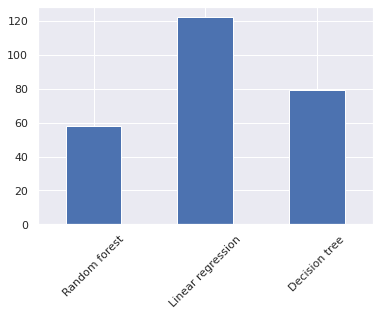

In [41]:
sns.set()
cv_scores_df = pd.DataFrame.from_dict(cv_scores, orient='index')
cv_scores_df.plot.bar(rot=45, legend=False)

#Evaluating models on test data : 

In [42]:
from sklearn.metrics import mean_squared_error

def evaluate_single_model(x, y, model):
  y_pred = model.predict(x)
  return np.sqrt(mean_squared_error(y, y_pred))

In [43]:
trained_models_dict = {}
trained_models_dict['Random forest'] = models_dict['Random forest'].best_estimator_
trained_models_dict['Linear regression'] = models_dict['Linear regression'][0]
trained_models_dict['Decision tree'] = models_dict['Decision tree'].best_estimator_
trained_models_dict

{'Random forest': RandomForestRegressor(n_estimators=200, random_state=42),
 'Linear regression': LinearRegression(),
 'Decision tree': DecisionTreeRegressor(max_features='auto', random_state=42)}

In [44]:
def evaluate_all_models(x, y, models_dict):
  test_set_scores = {}
  for k, v in models_dict.items():
    test_set_scores[k] = evaluate_single_model(x, y, v)
  return test_set_scores

##Preparing the test data : 

In [45]:
test = pd.read_csv('/content/AdvancedMLDLCourse/Assignments/Assignment I/test.csv')


In [46]:
X_test = test.drop(['count'], axis=1)
Y_test = test[['count']]

In [47]:
#Pipeline :
def test_preparation(X_test):
  X_test = delete_corr_features(X_test)
  X_test['datetime'] = pd.to_datetime(X_test['datetime'])
  X_test = create_new_date_features(X_test)
  X_test = create_new_weather_feature(X_test)
  X_test = drop_datetime(X_test)
  return X_test

In [48]:
X_test = test_preparation(X_test)

##Running models on test data : 

In [49]:
test_set_scores = evaluate_all_models(X_test, Y_test, trained_models_dict)
test_set_scores

{'Random forest': 48.48679083786593,
 'Linear regression': 118.38420001971105,
 'Decision tree': 71.94482639880883}

#Overall comparison : 


Let's combine the test and train results:



In [50]:
combined_dict = {k: [np.abs(v), test_set_scores[k]] for k, v in cv_scores.items()}
combined_dict

{'Random forest': [58.01935425642702, 48.48679083786593],
 'Linear regression': [121.98597453860837, 118.38420001971105],
 'Decision tree': [79.43264953199966, 71.94482639880883]}

Compare the test results to the train results : 

In [51]:
scores_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['CV score', 'Test set score'])
scores_df

,CV score,Test set score
Random forest,58.019354,48.486791
Linear regression,121.985975,118.384200
Decision tree,79.432650,71.944826


#Feature importance : 

In [52]:
feature_importance_dict = {}

While plotting the feature importance, we will treat the tree based methods and the classic regression methods differently

## Tree based methods : 

In [53]:
def find_tree_feature_importance(model, columns):
  importance = model.feature_importances_
  importance *= 100 / np.max(importance)  # Normalize
  importance = pd.DataFrame(importance, index=columns, columns=["Importance"])
  importance = importance.sort_values(by=['Importance'], ascending=False)
  return importance

In [54]:
feature_importance_dict['Random forest'] = find_tree_feature_importance(trained_models_dict['Random forest'], X.columns)
feature_importance_dict['Decision tree'] = find_tree_feature_importance(trained_models_dict['Decision tree'], X.columns)

##Classical regression methods:


In [55]:
def find_normalized_lr_feature_importance(model, x_train):
  coefficients = {x_train.columns[i]: np.abs(model.coef_[i]) for i in range(len(x_train.columns))}
  coefficients_df = pd.DataFrame.from_dict(coefficients, orient='index', columns=['Importance'])
  coefficients_df['Importance'] *=  x_train.std()
  coefficients_df['Importance'] *= 100 / coefficients_df['Importance'].max()
  importance = coefficients_df.sort_values(by=['Importance'], ascending=False)
  return importance

In [56]:
feature_importance_dict['Linear regression'] = find_normalized_lr_feature_importance(trained_models_dict['Linear regression'], X)


#Compare feature importance : 

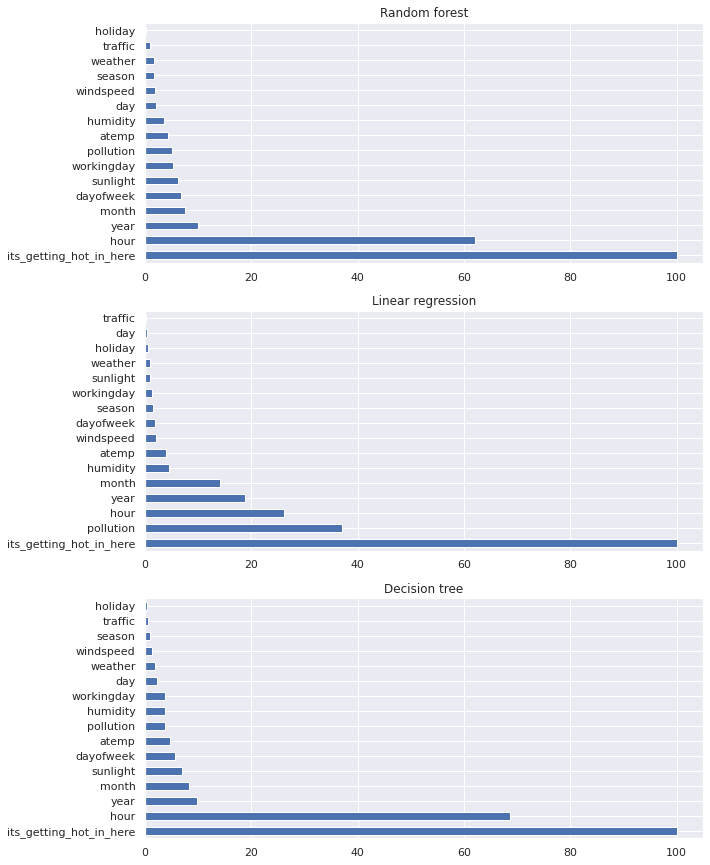

In [57]:
sns.set()

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
feature_importance_dict['Random forest'].plot(kind='barh', ax=axes[0], legend=False, title='Random forest')
feature_importance_dict['Linear regression'].plot(kind='barh', ax=axes[1], legend=False, title='Linear regression')
feature_importance_dict['Decision tree'].plot(kind='barh', ax=axes[2], legend=False, title='Decision tree')

## Removing weak features:<br>
Let's find the 3 weakest features in each model:



In [58]:
weak_features_dict = {}
for k, v in feature_importance_dict.items():
  weak_features_dict[k] = list(v.index.values[-3:])
weak_features_dict

{'Random forest': ['weather', 'traffic', 'holiday'],
 'Decision tree': ['season', 'traffic', 'holiday'],
 'Linear regression': ['holiday', 'day', 'traffic']}

Now we will remove the weak features : 

In [59]:
x_data_dict = {}
for k, v in weak_features_dict.items():
  x_data_dict[k] = (X.drop(v, axis=1), X_test.drop(v, axis=1))

We need to modify "run all models" function to fit different datasets

In [60]:
def run_all_models(x_dict, y):
  models_dict = {}
  models_dict['Random forest'] = run_random_forest(x_dict['Random forest'][0], y)
  models_dict['Linear regression'] = run_linear_regression(x_dict['Linear regression'][0], y)
  models_dict['Decision tree'] = run_decision_tree(x_dict['Decision tree'][0], y)
  return models_dict

## Let's watch some models run:
*Run the models after removing features :*

In [61]:
from IPython.display import Image
Image(url='https://media.tenor.com/9Mb6szFQBtMAAAAd/model-falling.gif')

In [62]:
models = run_all_models(x_data_dict, Y.values.ravel())
models

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .............max_features=auto;, score=-3634.901 total time=   4.8s
[CV 2/3] END .............max_features=auto;, score=-3491.803 total time=   4.7s
[CV 3/3] END .............max_features=auto;, score=-3326.494 total time=   4.8s
[CV 1/3] END .............max_features=sqrt;, score=-6018.134 total time=   1.7s
[CV 2/3] END .............max_features=sqrt;, score=-6604.150 total time=   1.7s
[CV 3/3] END .............max_features=sqrt;, score=-6620.665 total time=   1.7s
[CV 1/3] END .............max_features=log2;, score=-6018.134 total time=   1.7s
[CV 2/3] END .............max_features=log2;, score=-6604.150 total time=   1.7s
[CV 3/3] END .............max_features=log2;, score=-6620.665 total time=   1.7s
[CV 1/3] END max_features=0.3333333333333333;, score=-5420.906 total time=   2.0s
[CV 2/3] END max_features=0.3333333333333333;, score=-5748.889 total time=   2.0s
[CV 3/3] END max_features=0.3333333333333333;, 

{'Random forest': GridSearchCV(cv=3,
              estimator=RandomForestRegressor(n_estimators=200, random_state=42),
              param_grid={'max_features': ['auto', 'sqrt', 'log2',
                                           0.3333333333333333]},
              scoring='neg_mean_squared_error', verbose=3),
 'Linear regression': (LinearRegression(),
  array([-14241.94370665, -15157.7881094 , -15204.86449517])),
 'Decision tree': GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
              param_grid={'max_features': ['auto', 'sqrt', 'log2',
                                           0.3333333333333333]},
              scoring='neg_mean_squared_error', verbose=3)}

In [63]:
cv_scores = {}
cv_scores['Random forest'] = np.sqrt(abs(models_dict['Random forest'].best_score_))
cv_scores['Linear regression'] = np.sqrt(abs(models_dict['Linear regression'][1].mean()))
cv_scores['Decision tree'] = np.sqrt(abs(models_dict['Decision tree'].best_score_))
cv_scores

{'Random forest': 58.01935425642702,
 'Linear regression': 121.98597453860837,
 'Decision tree': 79.43264953199966}

In [64]:
trained_models_dict = {}
trained_models_dict['Random forest'] = models['Random forest'].best_estimator_
trained_models_dict['Linear regression'] = models['Linear regression'][0]
trained_models_dict['Decision tree'] = models['Decision tree'].best_estimator_

trained_models_dict

{'Random forest': RandomForestRegressor(n_estimators=200, random_state=42),
 'Linear regression': LinearRegression(),
 'Decision tree': DecisionTreeRegressor(max_features='auto', random_state=42)}

Modify evaluate_all_models : 

In [65]:
def evaluate_all_models(x_dict, y, models_dict):
  test_set_scores = {}
  for k, v in models_dict.items():
    test_set_scores[k] = evaluate_single_model(x_dict[k][1], y, v)
  return test_set_scores

In [66]:
test_set_scores = evaluate_all_models(x_data_dict, Y_test, trained_models_dict)
test_set_scores

{'Random forest': 50.42959652483455,
 'Linear regression': 118.37186321218361,
 'Decision tree': 71.10562508815372}

In [67]:
combined_dict = {k: [np.abs(v), test_set_scores[k]] for k, v in cv_scores.items()}
combined_dict

{'Random forest': [58.01935425642702, 50.42959652483455],
 'Linear regression': [121.98597453860837, 118.37186321218361],
 'Decision tree': [79.43264953199966, 71.10562508815372]}

Let's view the new results : 

In [68]:
new_scores_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['CV score removed features', 'Test set score removed features'])
new_scores_df

,CV score removed features,Test set score removed features
Random forest,58.019354,50.429597
Linear regression,121.985975,118.371863
Decision tree,79.432650,71.105625


And combine to one df:

In [69]:
combined_df = pd.concat([scores_df, new_scores_df], axis=1, ignore_index=False)
combined_df

,CV score,Test set score,CV score removed features,Test set score removed features
Random forest,58.019354,48.486791,58.019354,50.429597
Linear regression,121.985975,118.384200,121.985975,118.371863
Decision tree,79.432650,71.944826,79.432650,71.105625


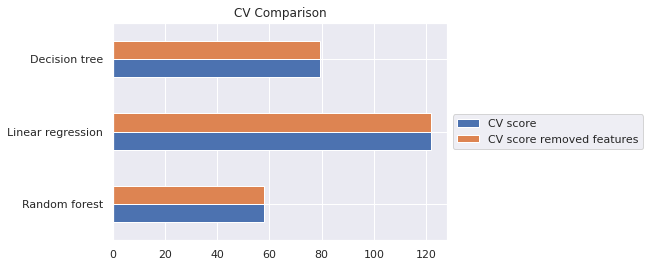

In [70]:
combined_df[['CV score', 'CV score removed features']].plot(kind='barh', title = 'CV Comparison').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


We can see that there isn't a lot of difference, but we are better off without removing the weak features.

# exercise1.csv

# New Section

In [71]:


results = {'model': ['Random forest', 'Decision tree', 'Linear regression'],
           'Score (RMSE)': ['48.486791', '71.944826', '121.985975'],
           'Hyperparams used': [['n_estimators=200', 'random_state=42'], ['max_features=auto', 'random_state=42'], ['None']],
           'Features dropped': [['atemp','datetime'], ['atemp','datetime'],['atemp','datetime']],
           'New features created': [['year','month','day','dayofweek','hour','its_getting_hot_in_here'],['year','month','day','dayofweek','hour','its_getting_hot_in_here'], ['year','month','day','dayofweek','hour','its_getting_hot_in_here']],
           'Runtime trainining + inference (seconds)': ['42.1', '0.47', '0.05'],
           'Hardware used (GPU/CPU/TPU)': ['GPU', 'GPU', 'GPU'],
           'Explainability (top 3 features)': [['its_getting_hot_in_here','hour','year'], ['its_getting_hot_in_here','hour','year'], ['its_getting_hot_in_here', 'pollution','hour']]
           }

df = pd.DataFrame(results)
df

,model,Score (RMSE),Hyperparams used,Features dropped,New features created,Runtime trainining + inference (seconds),Hardware used (GPU/CPU/TPU),Explainability (top 3 features)
0,Random forest,48.486791,"[n_estimators=200, random_state=42]","[atemp, datetime]","[year, month, day, dayofweek, hour, its_gettin...",42.1,GPU,"[its_getting_hot_in_here, hour, year]"
1,Decision tree,71.944826,"[max_features=auto, random_state=42]","[atemp, datetime]","[year, month, day, dayofweek, hour, its_gettin...",0.47,GPU,"[its_getting_hot_in_here, hour, year]"
2,Linear regression,121.985975,[None],"[atemp, datetime]","[year, month, day, dayofweek, hour, its_gettin...",0.05,GPU,"[its_getting_hot_in_here, pollution, hour]"


In [72]:
import os
df.to_csv(os.path.join(os.getcwd(), 'exercise1.csv'))
